Mindset

-Evaluation will be kept lenient, so make sure you attempt this case study.

-Read the question carefully and try to understand what exactly is being asked.

-Brainstorm a little. If you’re getting an error, remember that Google is your best friend.

-You can watch the lecture recordings or go through your lecture notes once again if you feel like you’re getting confused over some specific topics.

-Discuss your problems with your peers. Make use of the Slack channel and WhatsApp group.

-Only if you think that there’s a major issue, you can reach out to your Instructor via Slack or Email.

-There is no right or wrong answer. We have to get used to dealing with uncertainty in business. This is exactly the skill we want to develop.


#About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

Dataset

Link: Dataset_link

(After clicking on the above link, you can download the files by right-clicking on the page and clicking on "Save As", then naming the file as per your wish, with .csv as the extension.)

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

Show_id: Unique ID for every Movie / Tv Show
Type: Identifier - A Movie or TV Show
Title: Title of the Movie / Tv Show
Director: Director of the Movie
Cast: Actors involved in the movie/show
Country: Country where the movie/show was produced
Date_added: Date it was added on Netflix
Release_year: Actual Release year of the movie/show
Rating: TV Rating of the movie/show
Duration: Total Duration - in minutes or number of seasons
Listed_in: Genre
Description: The summary description

Hints

The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
Start by exploring a few questions: What type of content is available in different countries?
How has the number of movies released per year changed over the last 20-30 years?
Comparison of tv shows vs. movies.
What is the best time to launch a TV show?
Analysis of actors/directors of different types of shows/movies.
Does Netflix has more focus on TV Shows than movies in recent years
Understanding what content is available in different countries
Evaluation Criteria (100 Points):

1. Defining Problem Statement and Analysing basic metrics (10 Points)

2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot (10 Points)

4.3 For correlation: Heatmaps, Pairplots (10 Points)

5. Missing Value & Outlier check (Treatment optional) (10 Points)

6. Insights based on Non-Graphical and Visual Analysis (10 Points)

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

Submission Process:

Type your insights and recommendations in the rich-text editor.
Convert your jupyter notebook into PDF (Save as PDF using Chrome browser’s Print command), upload it in your Google Drive (set the permission to allow public access), and paste that link in the text editor.
Alternatively, you can directly submit your PDF on the portal.
Optionally, you may add images/graphs in the text editor by taking screenshots or saving matplotlib graphs using plt.savefig(...).
After submitting, you will not be allowed to edit your submission.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")
df = pd.read_csv(r'C:\Users\Vaibhav\Desktop\Netflix Case study\Netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [57]:
# df.to_csv(r"C:\Users\Vaibhav\Desktop\Netflix Case study\Netflix.csv",index=False)
#saved file to local drive to extract if needed in later stage

DEFINING PROBLEM STATEMENT:

-Problem statement consists of analysing existing data and analysing region-wise what are the various parameters which makes a show succesful.

These parameters may be type, duration, listed_in, dierctor, cast.

we also need to analyse the trend which is being followed / change over time.

In [58]:
print(df.shape)

(8807, 12)


Above shape of data shows that we have about 9000 entries which may provide a sufficiently large enough data set to begin our analysis acress categories, region and type.

In [59]:
print(df.isna().sum()/df.shape[0]*100)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


From above result we can infer that the data set contains some missing values.

For Example:

around 30% of entries doesn't have directors data.

around 10% of entries doesn't have cast or countries data

Lets analyse each columns individually to get more insights on dame data

In [60]:
for i in range(df.shape[1]):
    print(df[df.columns[i]].value_counts())

show_id
s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: count, Length: 8807, dtype: int64
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64
director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, St

Observations: by count we can only make any observations in categorical columns such as type, rating etc and not anu numerical data like duration

show_id: we can see that there are no duplicate value in show_id, hence it can be used as an index but for now we will leave it as it is

type: as we can see that there are far more movies count (6131) as compared to TV shows (2676).

title: Skipping this as just like show_id, titles are also unique

Directors: as we can see, most shows made by a single directior is 19, we will plot distribution along this columns in future to analyse further.

Cast/country/listed_in: Need to unpack the data as combination is also taken as unique. hence skipping it for now.

Date added, duration: being continuous data in nature will not be considered for count analysis.

release_Year: we can observe that there is a spike in number of titles in 2018 which is 1147 which is hish that both 2017 (1032 titles) and 2019 (1030) titles. we will deep down into this in future

rating: needs cleaning as rating includes data such as '74 min', '84 min'. Also TV-MA and TV-14 has highest titles which is 3207 and 2160 respectively.

duration: to analyse this first we need to seperate both movies and TV show as unit of measurements are different in both type (seasons in case of TV show and mins in case of movies).

description: Surprisingly we see that description are repeating which may suggest that same titles are being repeated multiple times. Need to dive deep and analyse repeating titles.

In [61]:
#checking titles having same description (description repeating more than once)
sample = df[df.description.isin(df.description.value_counts()[df.description.value_counts()>1].index)]
sample.sort_values(by="description")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
78,s79,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,"September 11, 2021",2020,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
79,s80,Movie,Tughlaq Durbar (Telugu),Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,"September 11, 2021",2021,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
7022,s7023,Movie,Hum Saath-Saath Hain,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,"January 1, 2018",1999,TV-G,176 min,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...
2969,s2970,Movie,Together For Eternity,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,"February 1, 2020",1999,TV-G,176 min,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...
3492,s3493,Movie,Oh! Baby (Malayalam),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",NaN,"September 25, 2019",2019,TV-14,146 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
3516,s3517,Movie,Oh! Baby,B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,"September 14, 2019",2019,TV-14,157 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
3493,s3494,Movie,Oh! Baby (Tamil),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",NaN,"September 25, 2019",2019,TV-14,146 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
8051,s8052,Movie,Solo: A Star Wars Story,Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,"January 9, 2019",2018,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...
8052,s8053,Movie,Solo: A Star Wars Story (Spanish Version),Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,"January 9, 2019",2018,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...
5965,s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."


We can see that same titles are repeated due to various reasons:

1. same title released in multiple languages: Example "bhoomika"
2. spelling of titles varies for some movies titles: "Ollie & Moon" and "The Ollie & Moon Show" which are essentially the same.
3. rating changed over time, for example: "Chashme Baddoor" in May 2017 it was TV-PG, again added in July 2020 as TV-14.

UNIVARIATE ANALYSIS

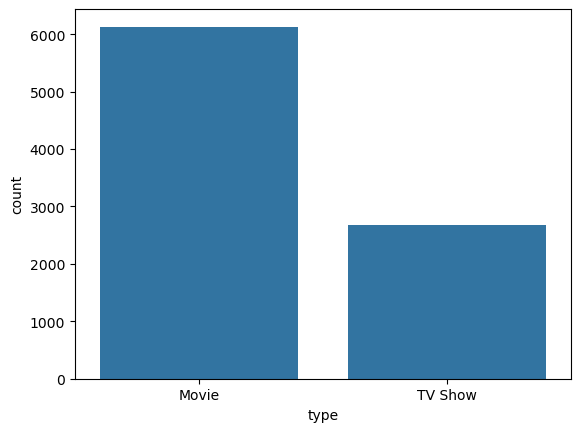

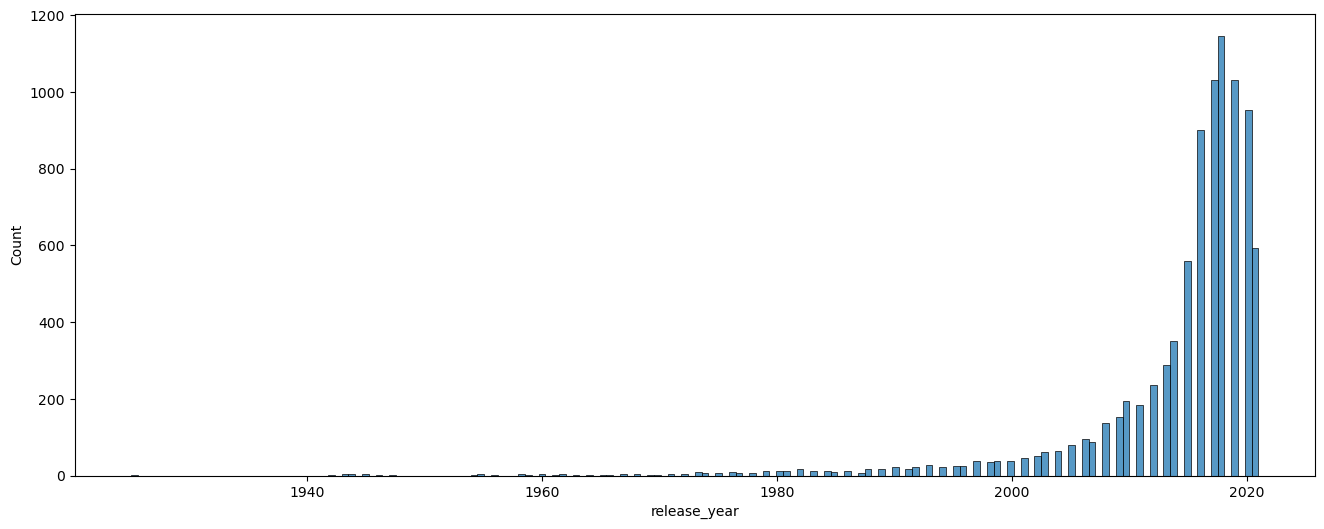

<Axes: xlabel='rating', ylabel='count'>

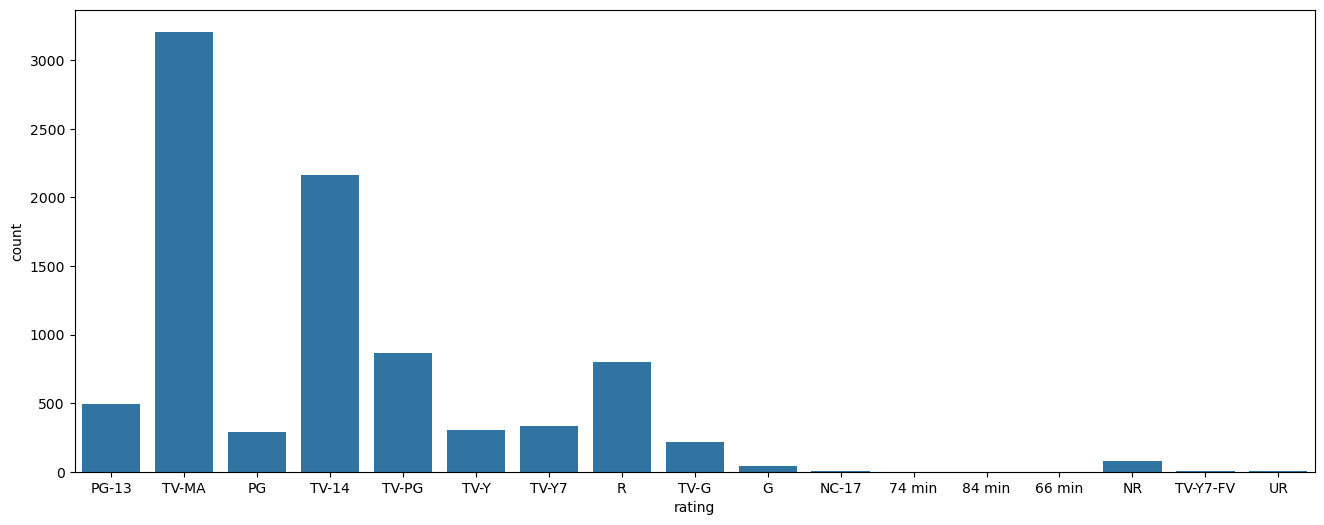

In [88]:

sns.countplot(x = 'type', data = df)
plt.show()

plt.figure(figsize=(16,6))
sns.histplot(x = 'release_year', data = df)
plt.show()

plt.figure(figsize=(16,6))
sns.countplot(data = df,x='rating')


We can see that for each 